In [1]:
import sys
sys.path.append('/Users/shiyihe/Desktop/USABILITY_ANALYSIS')   

from duration_processor import load_quiz_data

# load data , rename task name, etc,.
folder = '/Users/shiyihe/Desktop/USABILITY_ANALYSIS/tabular'
all_data = load_quiz_data(folder, ignore_completed=True)

/var/folders/hs/htjkkv116fv94g1llc3jj8jc0000gn/T/ipykernel_97839/915270573.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/var/folders/hs/htjkkv116fv94g1llc3jj8jc0000gn/T/ipykernel_97839/915270573.py:29: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig2.show()


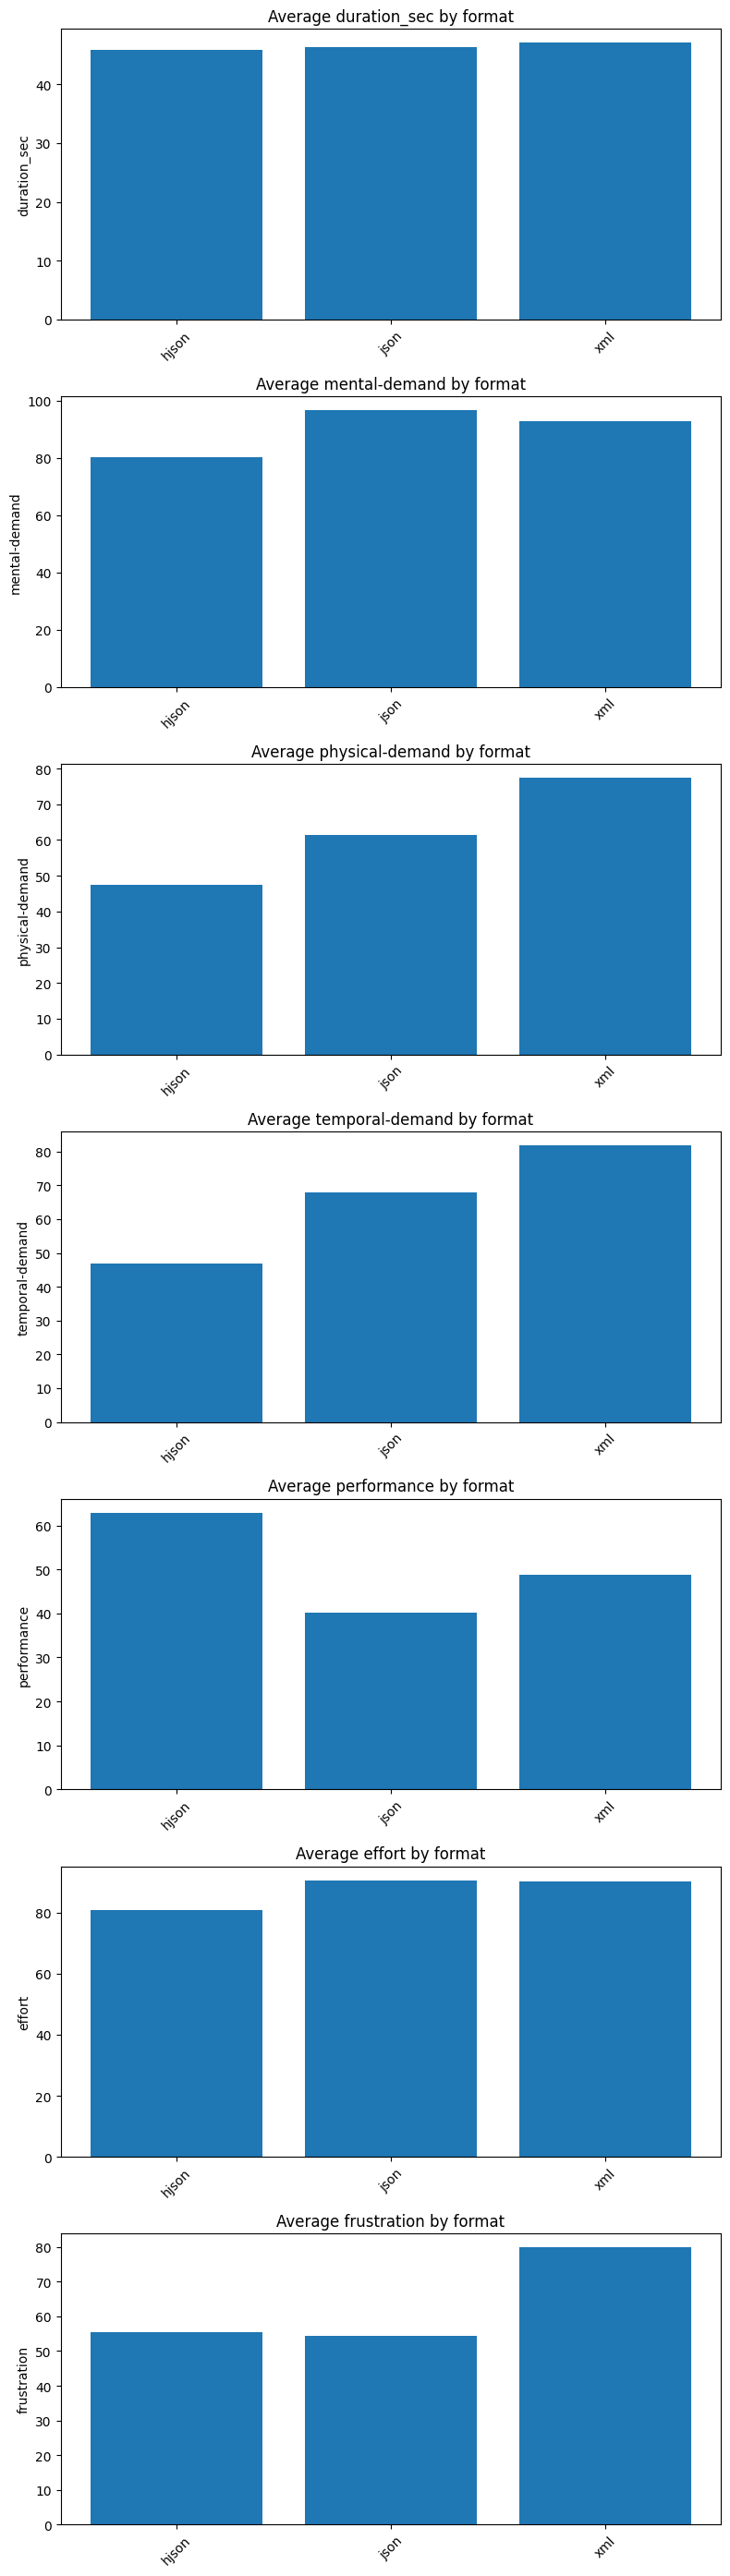

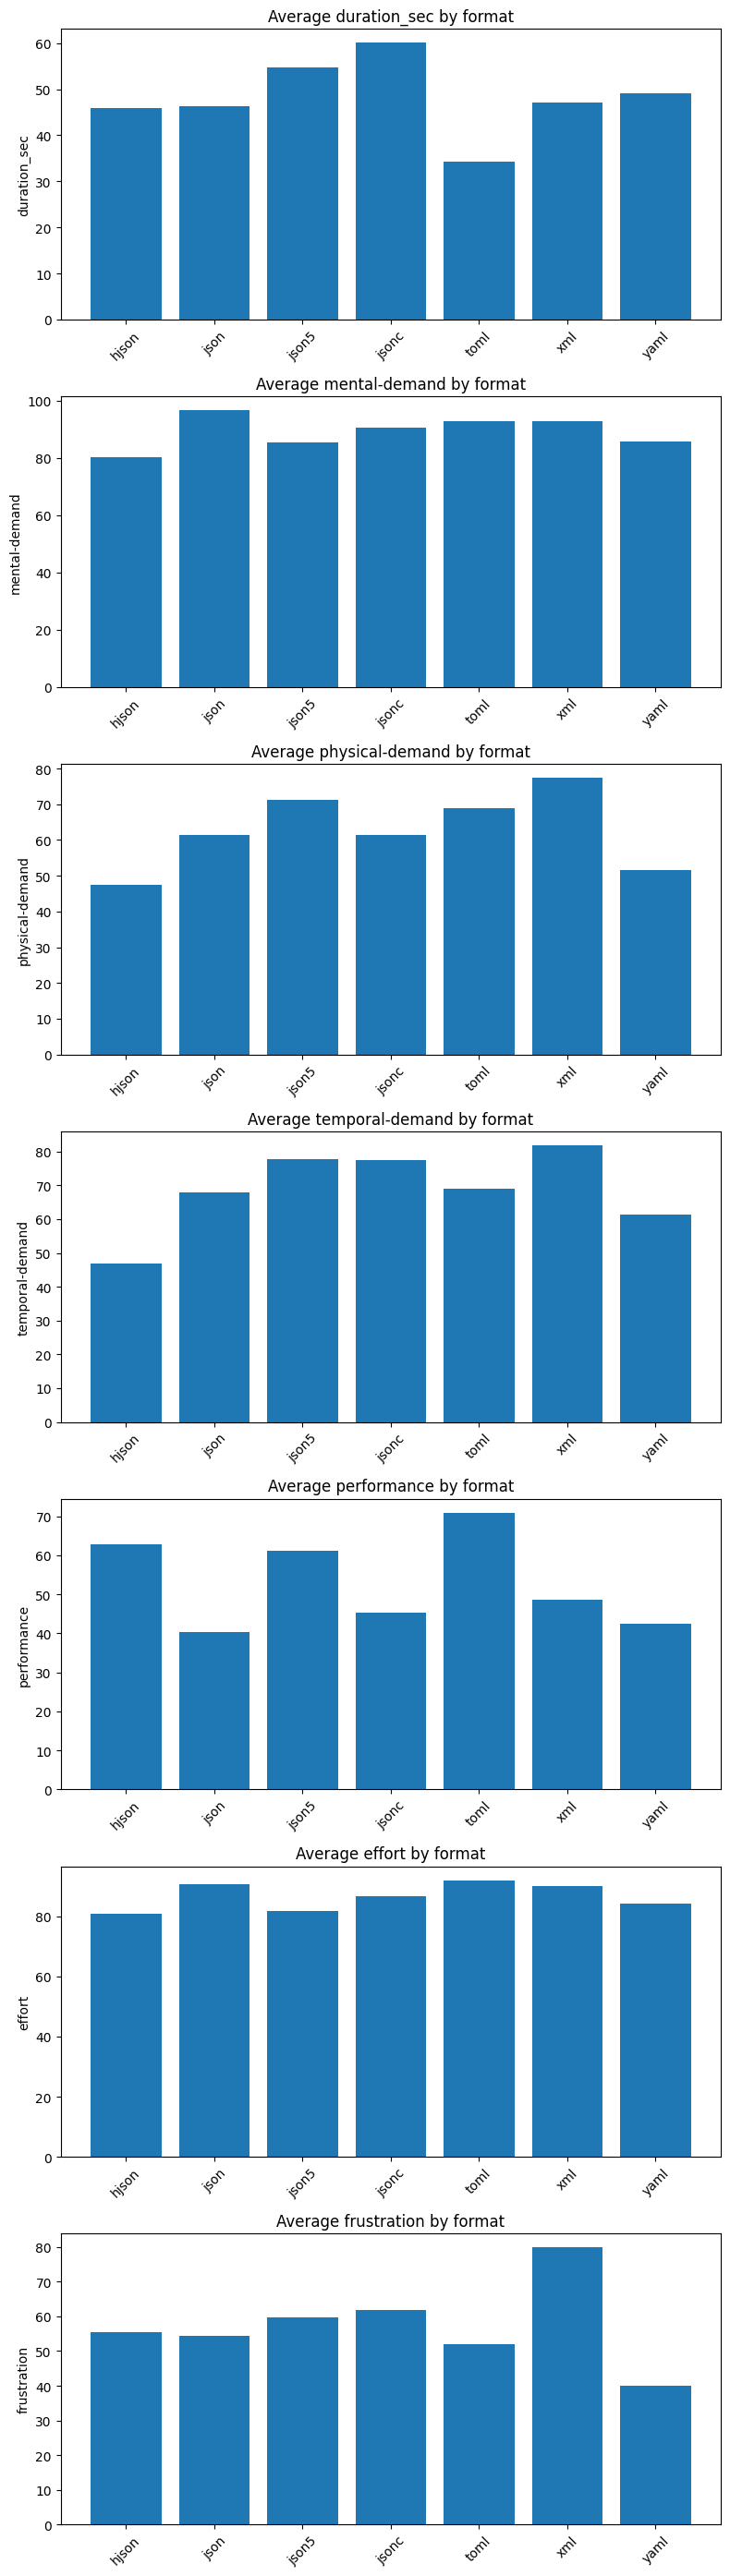

In [2]:
from quiz_evaluator import (
    analyze_nasa_and_post_surveys,
    plot_nasa_tlx_by_format
)

# 假设 all_data 已加载
df_nasa = analyze_nasa_and_post_surveys(all_data)

# 只看 json/xml/hjson 三种格式，并绘制所有 NASA-TLX 维度
fig = plot_nasa_tlx_by_format(
    df_nasa,
    format_list=['json','xml','hjson']
)
fig.show()

# 如果只想看时长和“努力（effort）”两个维度：
fig2 = plot_nasa_tlx_by_format(
    df_nasa,
    metrics = [
    'duration_sec',
    'mental-demand',
    'physical-demand',
    'temporal-demand',
    'performance',
    'effort',
    'frustration'
]
)
fig2.show()


In [ ]:
df_task.head(20)

  format                      task  duration_sec  difficulty  confidence
0  hjson  modifying-task-tabular-1      8.020778    3.000000    5.666667
1  hjson  modifying-task-tabular-2      8.992667    2.555556    6.000000
2  hjson  modifying-task-tabular-3      6.546000    3.666667    4.111111
3  hjson  modifying-task-tabular-4      8.746556    4.777778    3.777778
4  hjson    reading-task-tabular-1      9.005667    1.888889    5.333333


/var/folders/hs/htjkkv116fv94g1llc3jj8jc0000gn/T/ipykernel_97839/1707907283.py:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


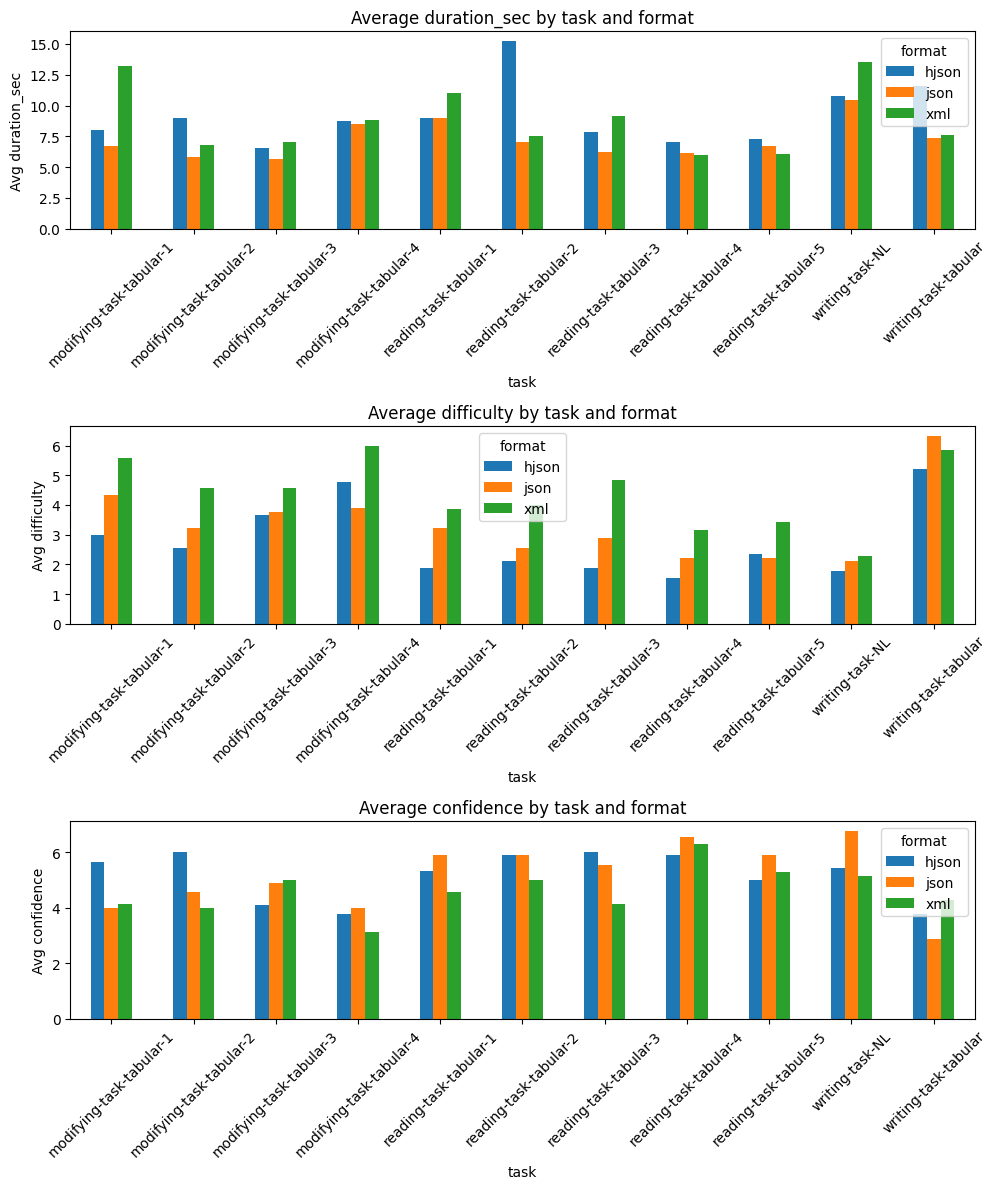

In [3]:
from quiz_evaluator import (
    extract_post_task_questions,
    plot_metrics_by_format_and_task,
    sanitize_task_names
)

df_post = extract_post_task_questions(all_data)

# 3. 查看 summary（可选）
df_clean = df_post.copy()
df_clean['task'] = sanitize_task_names(df_clean)['task']
summary = (
    df_clean
      .groupby(['format','task'])[['duration_sec','difficulty','confidence']]
      .mean()
      .reset_index()
)
print(summary.head())

# 4. 可视化：只看 json/xml/hjson 三种格式
fig = plot_metrics_by_format_and_task(
    df_post,
    format_list=['json','xml','hjson'],
    metrics=['duration_sec','difficulty','confidence']
)
fig.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



=== Categorical mappings (excluding q12) ===

q11:
  'Not familiar at all' → 0
  'Somewhat familiar' → 1
  'Very familiar' → 2

q13:
  'Dysgraphia (e.g., difficulty with handwriting or written expression).' → 0
  'Dyslexia (e.g., difficulty reading or distinguishing symbols, such as "b" and "d").' → 1
  'No, I do not have any cognitive-related conditions.' → 2

q13-other:
  '' → 0

q14:
  'No, I do not have any related conditions.' → 0
  'Prefer not to say.;No, I do not have any related conditions.' → 1

q14-other:
  '' → 0

q7:
  '' → 0
  'I enjoyed learning more about HJSON this will make me look more into coding and coding languages' → 1
  'I mostly use google sheets as a way of doing programming without needing to accualy code, due to dysgraphia I found programs like excel or libre office being way better thanks to its visual interface, and being able to see live whats going on throu commands. Recently I found that google sheets has an option for scripts to be added into the sheet

/var/folders/hs/htjkkv116fv94g1llc3jj8jc0000gn/T/ipykernel_97839/449912828.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figs['numeric'].show()
/var/folders/hs/htjkkv116fv94g1llc3jj8jc0000gn/T/ipykernel_97839/449912828.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/var/folders/hs/htjkkv116fv94g1llc3jj8jc0000gn/T/ipykernel_97839/449912828.py:20: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figs['q12'].show()


Question: q11
Question: q13
Question: q13-other
Question: q14
Question: q14-other
Question: q7
Question: q8
Question: q9
Question: q9-other


/opt/anaconda3/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  func(*args, **kwargs)


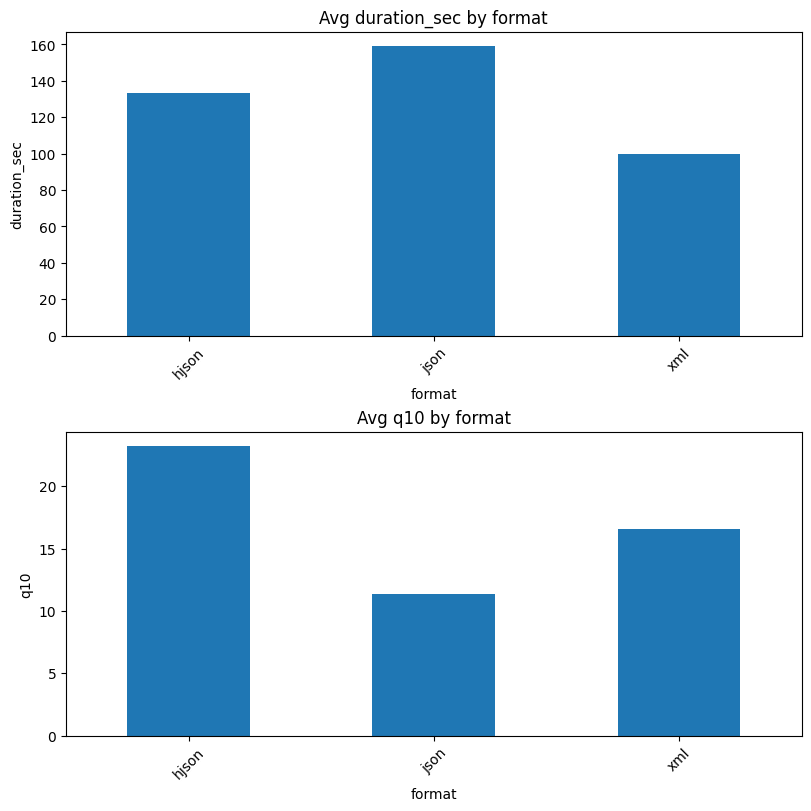

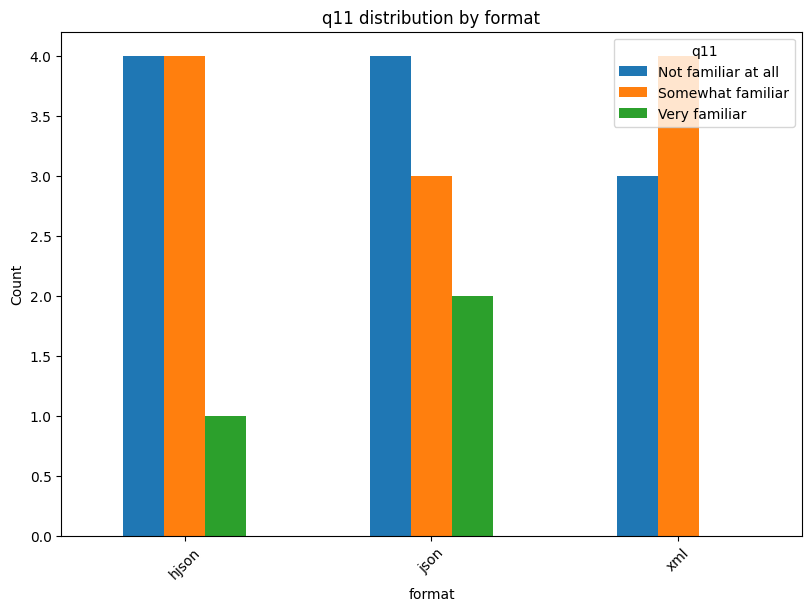

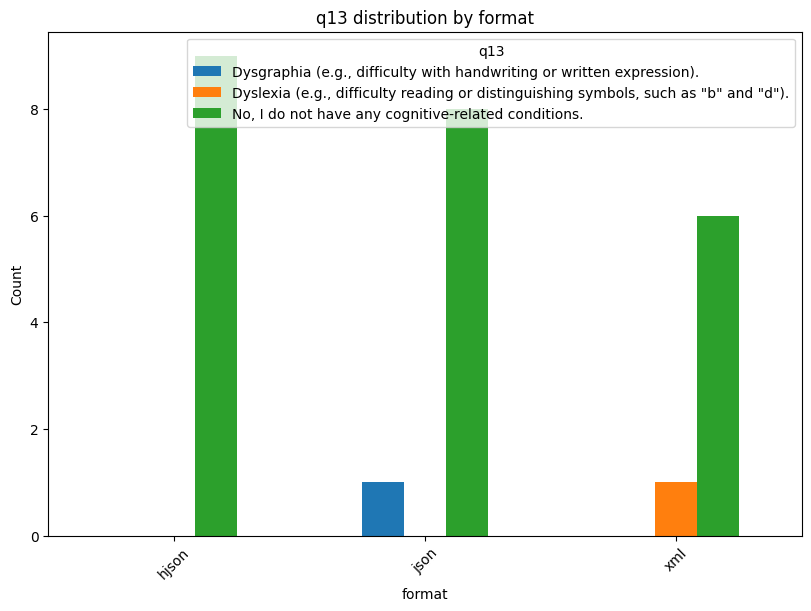

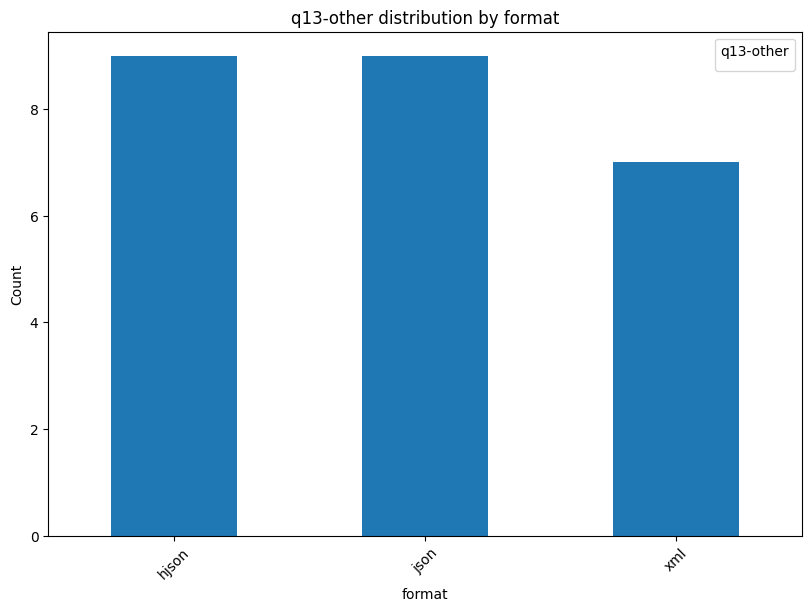

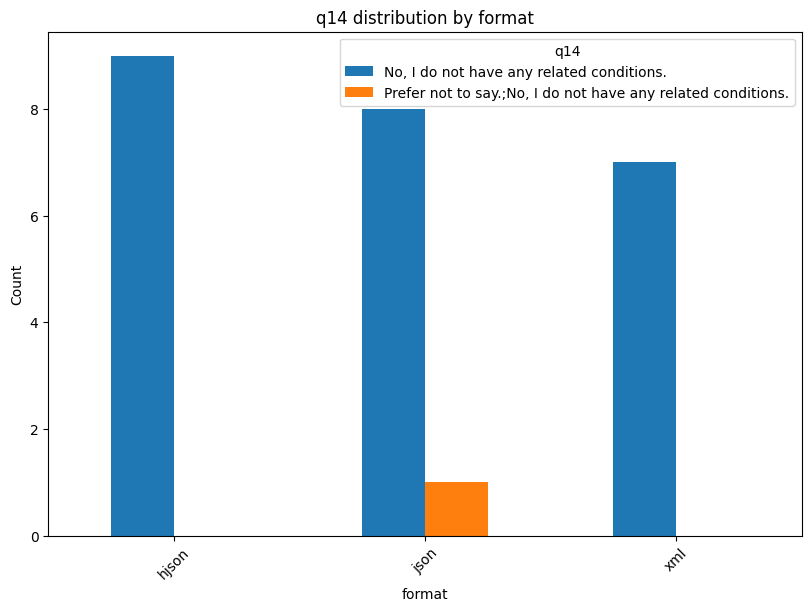

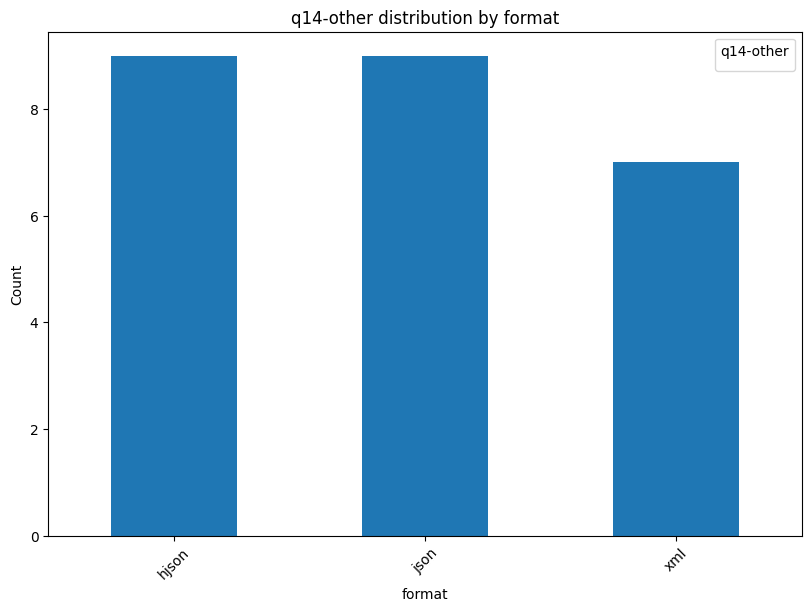

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


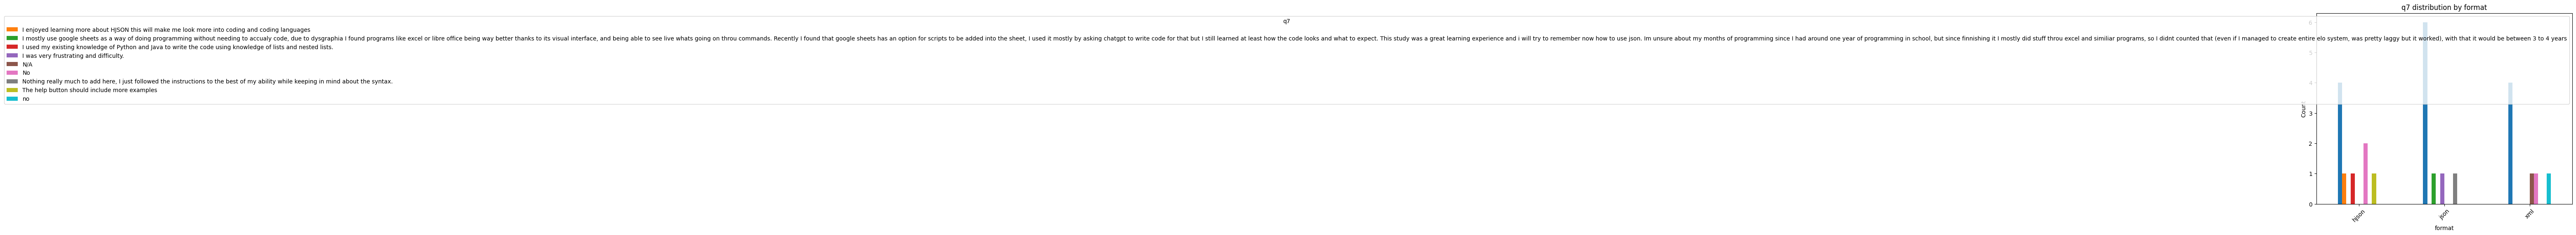

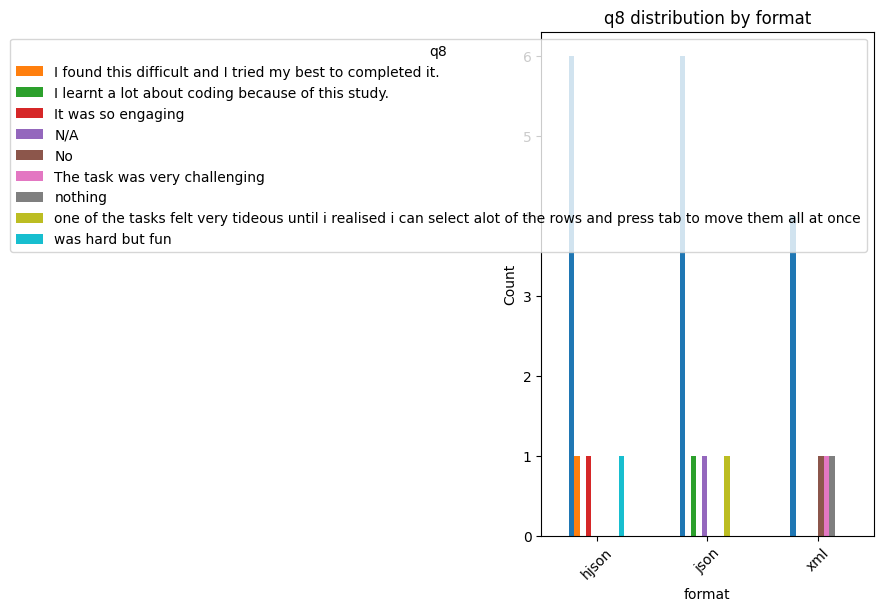

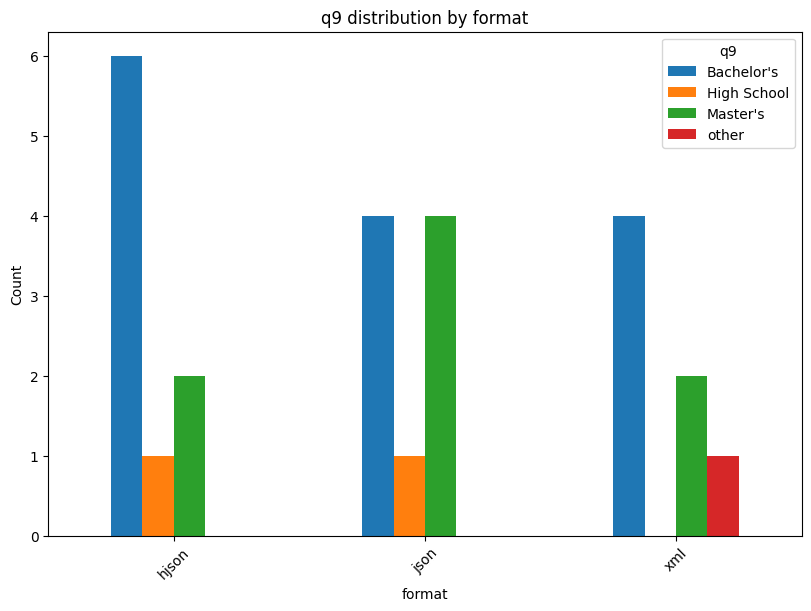

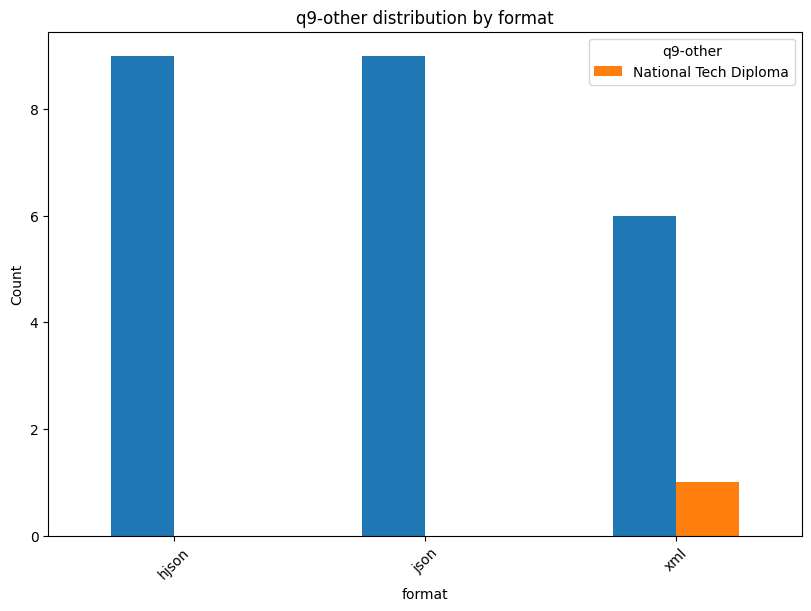

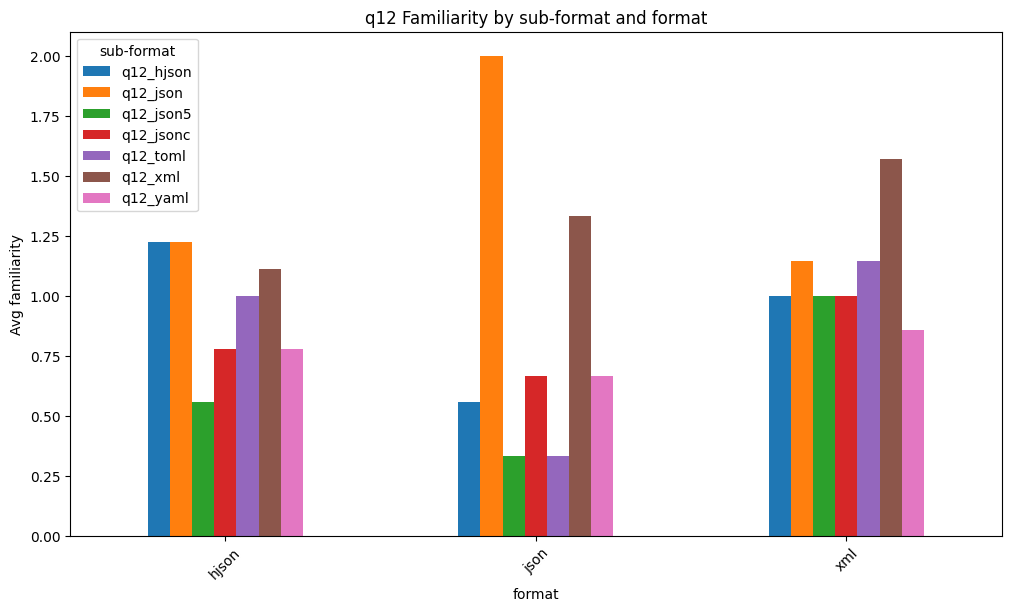

In [4]:
from quiz_evaluator import (
    extract_post_task_survey,
    plot_post_task_survey_by_format
)

# 1. 提取数据
df_survey = extract_post_task_survey(all_data)

# 2. 可视化并获取每个 Figure
figs = plot_post_task_survey_by_format(
    df_survey,
    format_list=['json','xml','hjson']
)

# 3. 展示
figs['numeric'].show()
for q, fig in figs['categorical'].items():
    print("Question:", q)
    fig.show()
figs['q12'].show()